# No interactions model analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use seaborn with latex
sns.set(rc={'text.usetex' : True})

In [3]:
from pathlib import Path

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
BASE_DATA_PATH = Path("../../../../ilmart-data/")
df = pd.read_csv(BASE_DATA_PATH / "no-inter/eval.csv", index_col=0)
df

,dataset,subset,strategy,budget,n_feature_used,cutoff,ndcg
0,web30k,vali,greedy,30,30,1,0.442908
1,web30k,vali,greedy,30,30,5,0.442421
2,web30k,vali,greedy,30,30,10,0.463559
3,web30k,vali,greedy,95,76,1,0.448567
4,web30k,vali,greedy,95,76,5,0.445982
...,...,...,...,...,...,...,...
1129,istella,test,contrib,25,25,5,0.648041
1130,istella,test,contrib,25,25,10,0.706671
1131,istella,test,contrib,45,45,1,0.662182
1132,istella,test,contrib,45,45,5,0.653966


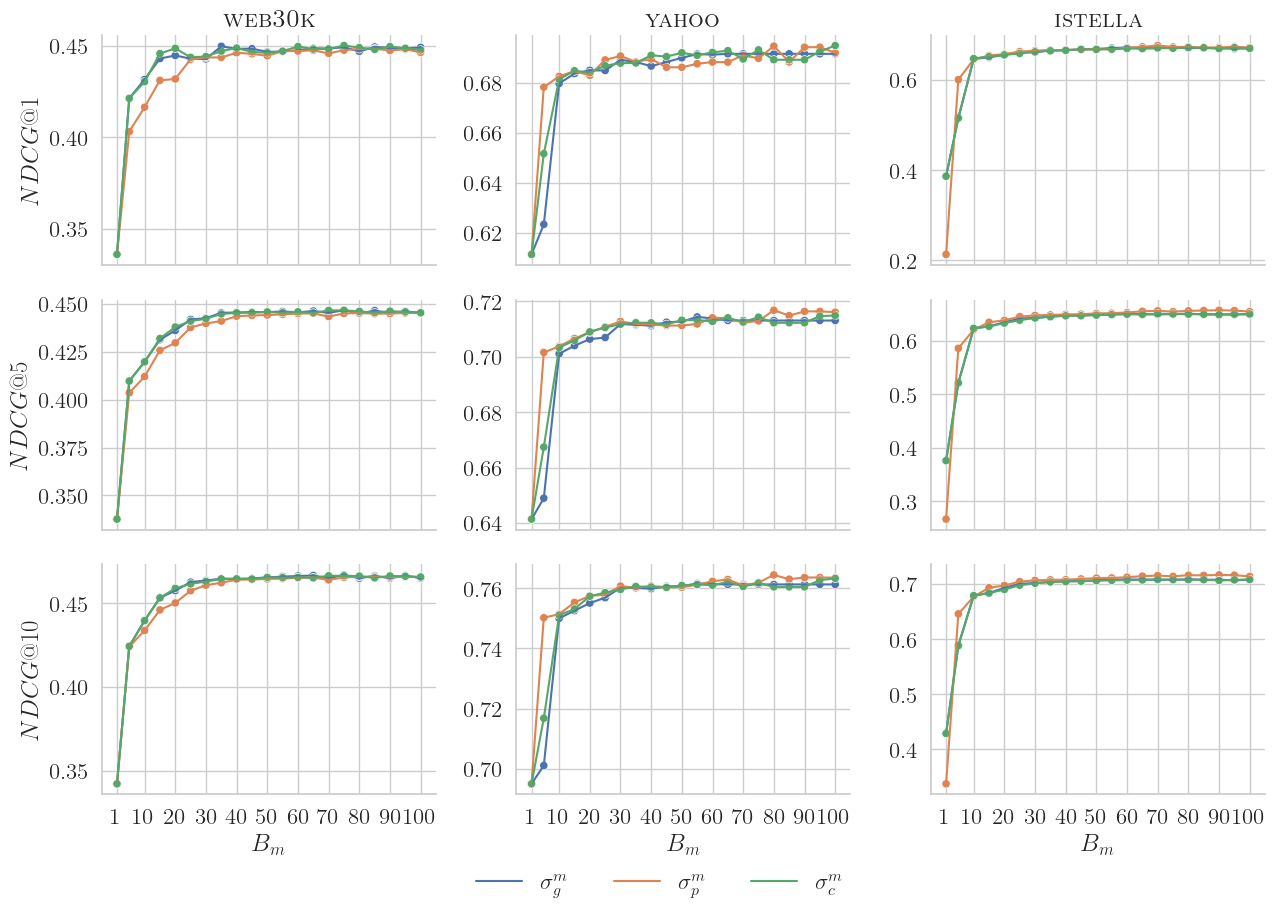

In [4]:
mapping_label_strategy = {"greedy": r"$\sigma_g^m$",
                          "prev": r"$\sigma_p^m$",
                          "contrib": r"$\sigma_c^m$",}
for subset in ["vali"]:
    df_to_plot = df[df["subset"] == subset].copy()
    df_to_plot["strategy"] =  df_to_plot["strategy"].map(mapping_label_strategy)
    g = sns.FacetGrid(df_to_plot, col="dataset", row="cutoff", sharey=False, sharex=True, aspect=1.5, margin_titles=True)
    g.map_dataframe(sns.scatterplot, x="budget", y="ndcg", hue="strategy")
    g.map_dataframe(sns.lineplot, x="budget", y="ndcg", hue="strategy", markersize=20)
    g.add_legend()
    g.set(xticks=[1] + list(np.arange(10, 101, 10)))
    g.set_xlabels("$B_m$")
    g.axes[0,0].set_ylabel("$NDCG@1$")
    g.axes[1,0].set_ylabel("$NDCG@5$")
    g.axes[2,0].set_ylabel("$NDCG@10$")
    g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template="")
    sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(0.47, -0.04))

    plt.savefig(f"./plots/no_inter_{subset}.pdf", bbox_inches='tight')

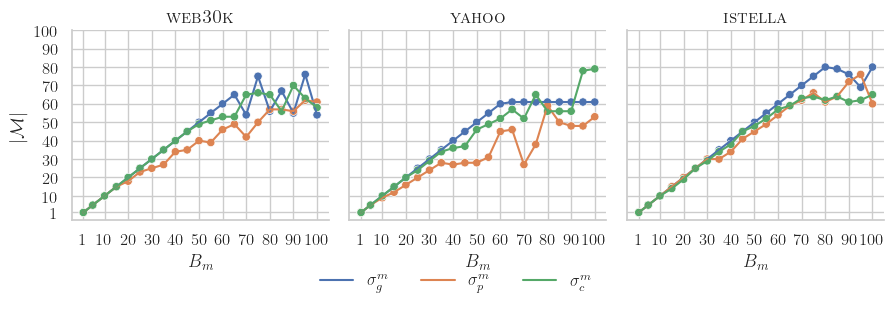

In [5]:
df_to_plot = df[(df["subset"] == "vali") & (df["cutoff"] == 1) ].copy()
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
df_to_plot["strategy"] =  df_to_plot["strategy"].map(mapping_label_strategy)
g = sns.FacetGrid(df_to_plot, col="dataset", sharey=True, sharex=True, aspect=1)
g.map_dataframe(sns.scatterplot, x="budget", y="n_feature_used", hue="strategy")
g.map_dataframe(sns.lineplot, x="budget", y="n_feature_used", hue="strategy")
g.add_legend()
g.set(xticks=[1] + list(np.arange(10, 101, 10)), yticks=[1] + list(np.arange(10, 101, 10)))

g.set_xlabels("$B_m$")
g.set_ylabels(r"$|\mathcal{M}|$")

g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template="")
sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(0.47, -0.06))
plt.savefig(f"./plots/no_inter_feat_used.pdf", bbox_inches='tight')